# Categorias no Pandas

Link Kaggle: https://www.kaggle.com/datasets/jsphyg/tipping

In [1]:
import pandas as pd

DADOS = "dados/tips.csv"

df = pd.read_csv(DADOS)

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Reconhecendo a base

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
df.describe(exclude="number")

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [5]:
for coluna in df.select_dtypes(include="object"):
    print(f"{coluna}: {df[coluna].unique()}")

sex: ['Female' 'Male']
smoker: ['No' 'Yes']
day: ['Sun' 'Sat' 'Thur' 'Fri']
time: ['Dinner' 'Lunch']


<Axes: >

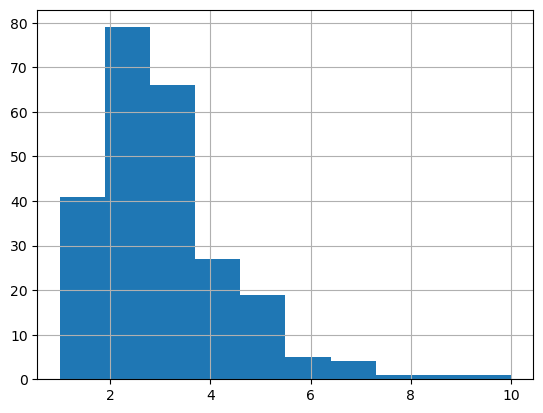

In [6]:
df["tip"].hist()

In [7]:
df["tip"].value_counts(bins=10)

(1.9, 2.8]     79
(2.8, 3.7]     66
(0.99, 1.9]    41
(3.7, 4.6]     27
(4.6, 5.5]     19
(5.5, 6.4]      5
(6.4, 7.3]      4
(7.3, 8.2]      1
(8.2, 9.1]      1
(9.1, 10.0]     1
Name: tip, dtype: int64

In [8]:
df["tip"].value_counts(bins=10).sort_index()

(0.99, 1.9]    41
(1.9, 2.8]     79
(2.8, 3.7]     66
(3.7, 4.6]     27
(4.6, 5.5]     19
(5.5, 6.4]      5
(6.4, 7.3]      4
(7.3, 8.2]      1
(8.2, 9.1]      1
(9.1, 10.0]     1
Name: tip, dtype: int64

## Pandas cut

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html#pandas.cut

In [9]:
faixas = [0, 2, 5, float("inf")]  # (0, 2] (2, 5] (5, inf]
categorias = ["baixo", "medio", "alto"]

df["categoria_tip"] = pd.cut(df["tip"], bins=faixas, labels=categorias)

df.head()

,total_bill,tip,sex,smoker,day,time,size,categoria_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,baixo
1,10.34,1.66,Male,No,Sun,Dinner,3,baixo
2,21.01,3.50,Male,No,Sun,Dinner,3,medio
3,23.68,3.31,Male,No,Sun,Dinner,2,medio
4,24.59,3.61,Female,No,Sun,Dinner,4,medio


In [10]:
df["categoria_tip"].value_counts()

medio    148
baixo     78
alto      18
Name: categoria_tip, dtype: int64

In [11]:
df["categoria_tip"].value_counts(normalize=True)

medio    0.606557
baixo    0.319672
alto     0.073770
Name: categoria_tip, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   total_bill     244 non-null    float64 
 1   tip            244 non-null    float64 
 2   sex            244 non-null    object  
 3   smoker         244 non-null    object  
 4   day            244 non-null    object  
 5   time           244 non-null    object  
 6   size           244 non-null    int64   
 7   categoria_tip  244 non-null    category
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 13.8+ KB


In [13]:
df["categoria_tip"]

0      baixo
1      baixo
2      medio
3      medio
4      medio
       ...  
239     alto
240    baixo
241    baixo
242    baixo
243    medio
Name: categoria_tip, Length: 244, dtype: category
Categories (3, object): ['baixo' < 'medio' < 'alto']

In [14]:
df["categoria_tip"].cat.categories

Index(['baixo', 'medio', 'alto'], dtype='object')

In [15]:
df["categoria_tip"].unique()

['baixo', 'medio', 'alto']
Categories (3, object): ['baixo' < 'medio' < 'alto']

In [16]:
df["categoria_tip"].cat.ordered

True

In [17]:
df["categoria_tip"].cat.codes

0      0
1      0
2      1
3      1
4      1
      ..
239    2
240    0
241    0
242    0
243    1
Length: 244, dtype: int8

In [18]:
df["categoria_tip"].sort_values()

0      baixo
148    baixo
147    baixo
146    baixo
145    baixo
       ...  
212     alto
172     alto
44      alto
214     alto
88      alto
Name: categoria_tip, Length: 244, dtype: category
Categories (3, object): ['baixo' < 'medio' < 'alto']

https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

## Criando categorias em outras colunas

In [19]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'categoria_tip'],
      dtype='object')

In [20]:
colunas_categoricas = ["sex", "smoker", "day", "time"]
df_categorizado = df.copy()
for coluna in colunas_categoricas:
    df_categorizado[coluna] = df_categorizado[coluna].astype("category")

df_categorizado.head()

,total_bill,tip,sex,smoker,day,time,size,categoria_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,baixo
1,10.34,1.66,Male,No,Sun,Dinner,3,baixo
2,21.01,3.50,Male,No,Sun,Dinner,3,medio
3,23.68,3.31,Male,No,Sun,Dinner,2,medio
4,24.59,3.61,Female,No,Sun,Dinner,4,medio


In [21]:
df_categorizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   total_bill     244 non-null    float64 
 1   tip            244 non-null    float64 
 2   sex            244 non-null    category
 3   smoker         244 non-null    category
 4   day            244 non-null    category
 5   time           244 non-null    category
 6   size           244 non-null    int64   
 7   categoria_tip  244 non-null    category
dtypes: category(5), float64(2), int64(1)
memory usage: 7.7 KB


In [22]:
for coluna in df_categorizado.select_dtypes(include="category"):
    print(f"{coluna}: {df_categorizado[coluna].unique()}")
    print(f"{coluna}.cat.categories: {df_categorizado[coluna].cat.categories}")
    print(f"{coluna}.cat.ordered: {df_categorizado[coluna].cat.ordered}")
    print()

sex: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
sex.cat.categories: Index(['Female', 'Male'], dtype='object')
sex.cat.ordered: False

smoker: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
smoker.cat.categories: Index(['No', 'Yes'], dtype='object')
smoker.cat.ordered: False

day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']
day.cat.categories: Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object')
day.cat.ordered: False

time: ['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']
time.cat.categories: Index(['Dinner', 'Lunch'], dtype='object')
time.cat.ordered: False

categoria_tip: ['baixo', 'medio', 'alto']
Categories (3, object): ['baixo' < 'medio' < 'alto']
categoria_tip.cat.categories: Index(['baixo', 'medio', 'alto'], dtype='object')
categoria_tip.cat.ordered: True



## Categorias ordenadas

In [23]:
df_categorizado["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [24]:
df_categorizado["day"].value_counts().sort_index()

Fri     19
Sat     87
Sun     76
Thur    62
Name: day, dtype: int64

<Axes: >

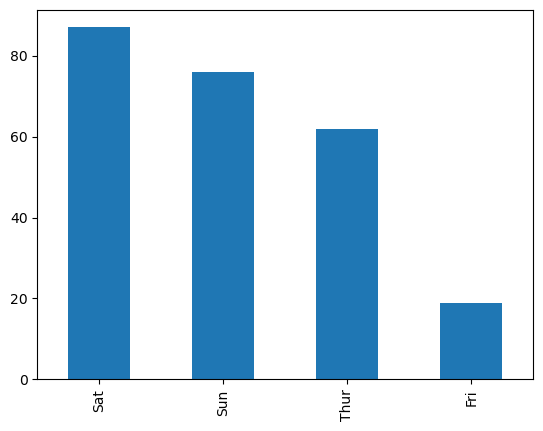

In [25]:
df_categorizado["day"].value_counts().plot(kind="bar")

<Axes: >

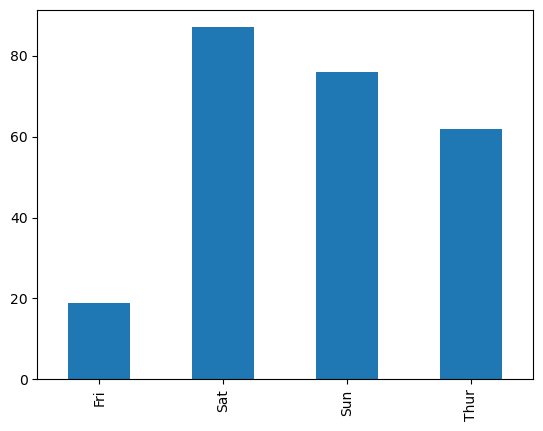

In [26]:
df_categorizado["day"].value_counts().sort_index().plot(kind="bar")

In [27]:
dias_da_semana = ["Thur", "Fri", "Sat", "Sun"]
df_categorizado["day"] = df_categorizado["day"].cat.set_categories(dias_da_semana, ordered=True)

df_categorizado.head()

,total_bill,tip,sex,smoker,day,time,size,categoria_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,baixo
1,10.34,1.66,Male,No,Sun,Dinner,3,baixo
2,21.01,3.50,Male,No,Sun,Dinner,3,medio
3,23.68,3.31,Male,No,Sun,Dinner,2,medio
4,24.59,3.61,Female,No,Sun,Dinner,4,medio


In [28]:
df_categorizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   total_bill     244 non-null    float64 
 1   tip            244 non-null    float64 
 2   sex            244 non-null    category
 3   smoker         244 non-null    category
 4   day            244 non-null    category
 5   time           244 non-null    category
 6   size           244 non-null    int64   
 7   categoria_tip  244 non-null    category
dtypes: category(5), float64(2), int64(1)
memory usage: 7.7 KB


In [29]:
df_categorizado["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [30]:
df_categorizado["day"].value_counts().sort_index()

Thur    62
Fri     19
Sat     87
Sun     76
Name: day, dtype: int64

<Axes: >

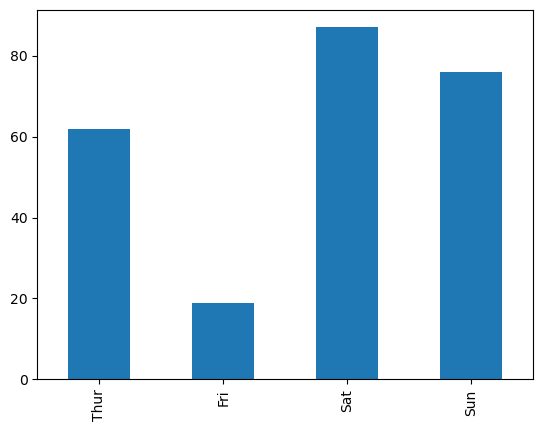

In [31]:
df_categorizado["day"].value_counts().sort_index().plot(kind="bar")

In [32]:
for coluna in df_categorizado.select_dtypes(include="category"):
    print(f"{coluna}: {df_categorizado[coluna].unique()}")
    print(f"{coluna}.cat.categories: {df_categorizado[coluna].cat.categories}")
    print(f"{coluna}.cat.ordered: {df_categorizado[coluna].cat.ordered}")
    print()

sex: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
sex.cat.categories: Index(['Female', 'Male'], dtype='object')
sex.cat.ordered: False

smoker: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
smoker.cat.categories: Index(['No', 'Yes'], dtype='object')
smoker.cat.ordered: False

day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur' < 'Fri' < 'Sat' < 'Sun']
day.cat.categories: Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')
day.cat.ordered: True

time: ['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']
time.cat.categories: Index(['Dinner', 'Lunch'], dtype='object')
time.cat.ordered: False

categoria_tip: ['baixo', 'medio', 'alto']
Categories (3, object): ['baixo' < 'medio' < 'alto']
categoria_tip.cat.categories: Index(['baixo', 'medio', 'alto'], dtype='object')
categoria_tip.cat.ordered: True

